In [251]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC

In [252]:
#Use Iris dataset with only two features, namely petal length (cm) and petal width (cm)
data = datasets.load_iris()
df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
df = pd.DataFrame(df[['petal length (cm)','petal width (cm)','target']])

In [253]:
df.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


In [254]:

#convert your data into two class data set as single class
df=df.replace(0, 1)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html

In [255]:
#get your new dataset  fed into the plot_2d_examples function

def plot_2d_examples(classifiers, names, datasets, figsize=(27,9), h = .02):
  """
  Here we define a helper method. We want to make a lot of visualizations, so lets
  organize the visualization code into a method we can re-use.
  - classifiers is a list of scikit-learn classifier objects
  - names is a list of strings corresponding to each classifier in 'classifiers'. As such they should have the same length
  - datasets will be a list of 2D datasets, each being a tuple of (X, y)
  - h is the step size of the mesh. Smaller sizes show more detail
  """
  figure = plt.figure(figsize=figsize)
  i = 1

  # iterate over datasets
  for ds_cnt, ds in enumerate(datasets):
      # preprocess dataset, split into training and test part
      X, y = ds
      X = StandardScaler().fit_transform(X)
      X_train, X_test, y_train, y_test = \
          train_test_split(X, y, test_size=.4, random_state=42)

      x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
      y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

      # just plot the dataset first
      cm = plt.cm.RdBu
      cm_bright = ListedColormap(['#FF0000', '#0000FF'])
      ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
      if ds_cnt == 0:
          ax.set_title("Input data")
      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                 edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
                 edgecolors='k')
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
      i += 1

      # iterate over classifiers
      for name, clf in zip(names, classifiers):
          ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
          clf.fit(X_train, y_train)
          score = clf.score(X_test, y_test)

          # Plot the decision boundary. For that, we will assign a color to each
          # point in the mesh [x_min, x_max]x[y_min, y_max].
          if hasattr(clf, "decision_function"):
              Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
          else:
              Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

          # Put the result into a color plot
          Z = Z.reshape(xx.shape)
          ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

          # Plot the training points
          ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                     edgecolors='k')
          # Plot the testing points
          ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                     edgecolors='k', alpha=0.3)

          ax.set_xlim(xx.min(), xx.max())
          ax.set_ylim(yy.min(), yy.max())
          ax.set_xticks(())
          ax.set_yticks(())
          if ds_cnt == 0:
              ax.set_title(name)
          ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                  size=15, horizontalalignment='right')
          i += 1

  plt.tight_layout()
  plt.show()

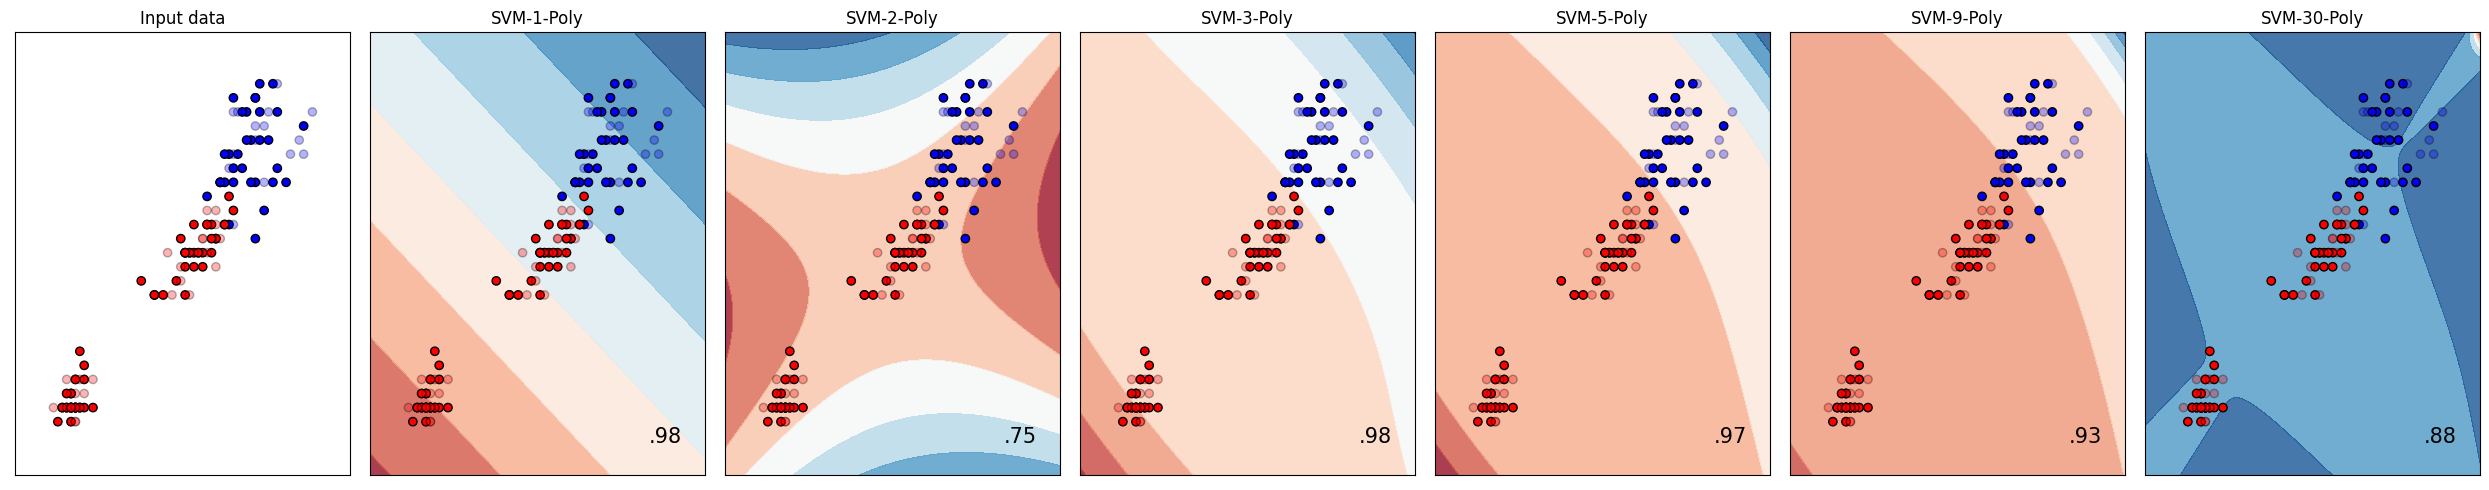

In [256]:
#Using plot_2d_examples function, evaluate (plot side-by-side) different SVM classifiers with polynomial kernels of varying degrees. Also, try several C values.
classifiers = []
names = []
X=df[df.columns[0:2]]
y=df ['target']
dataset=[(X,y)]
for i in [1, 2, 3, 5, 9, 30]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=0.0001))
  names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(25,5))

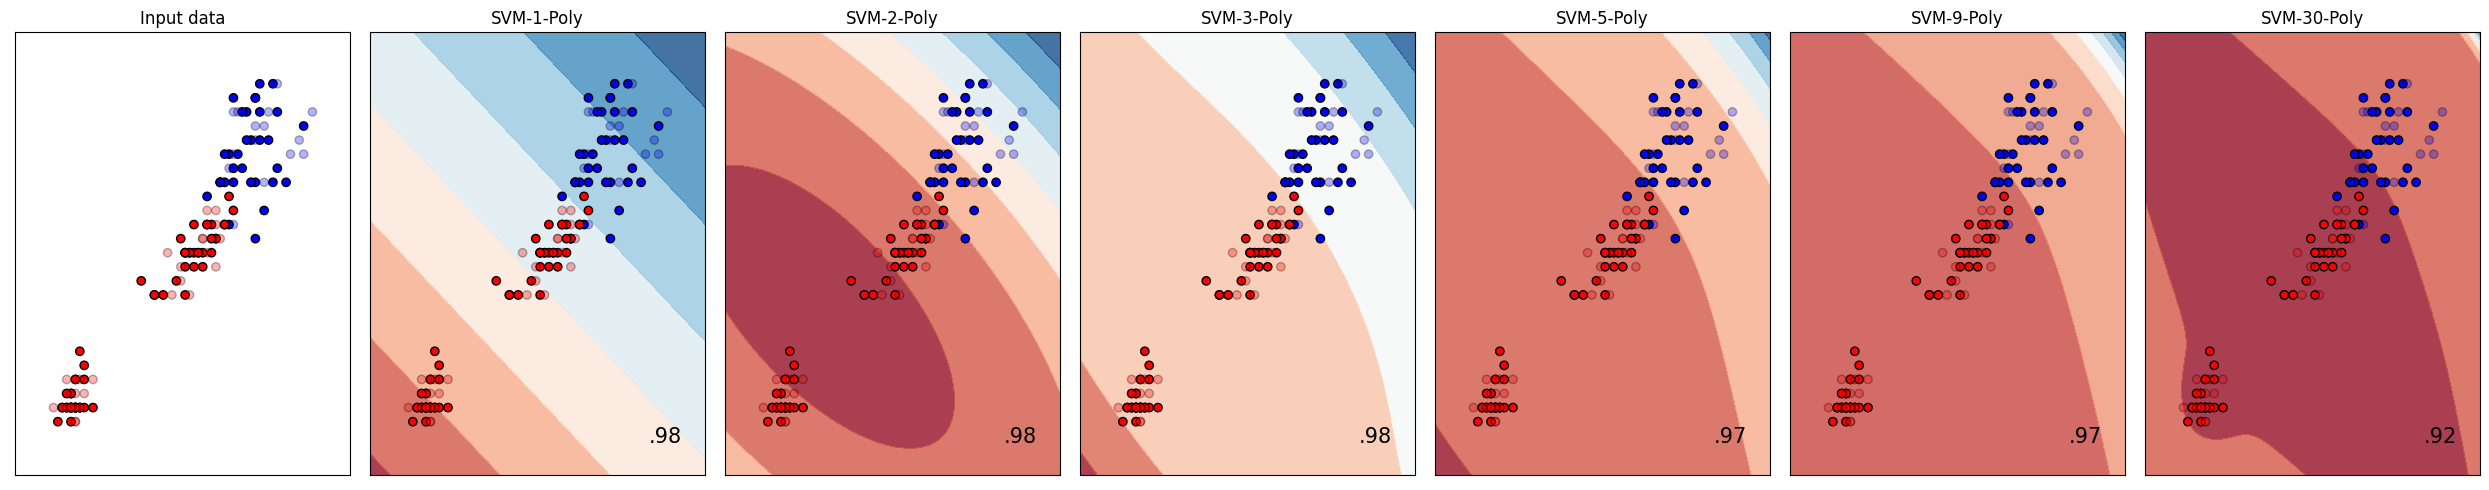

In [257]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=0.1))
  names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(25,5))

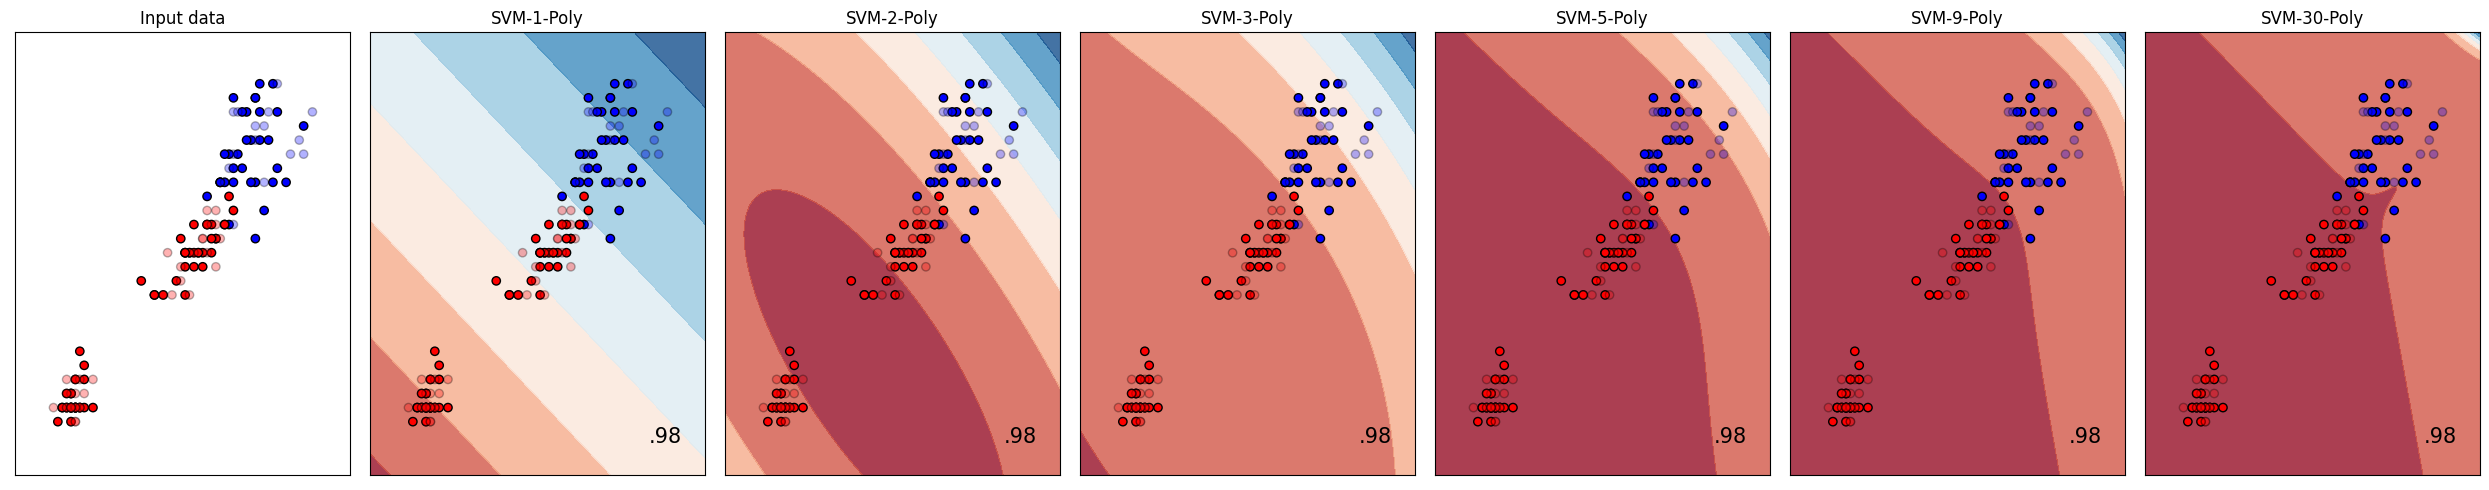

In [258]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=0.5))
  names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(25,5))

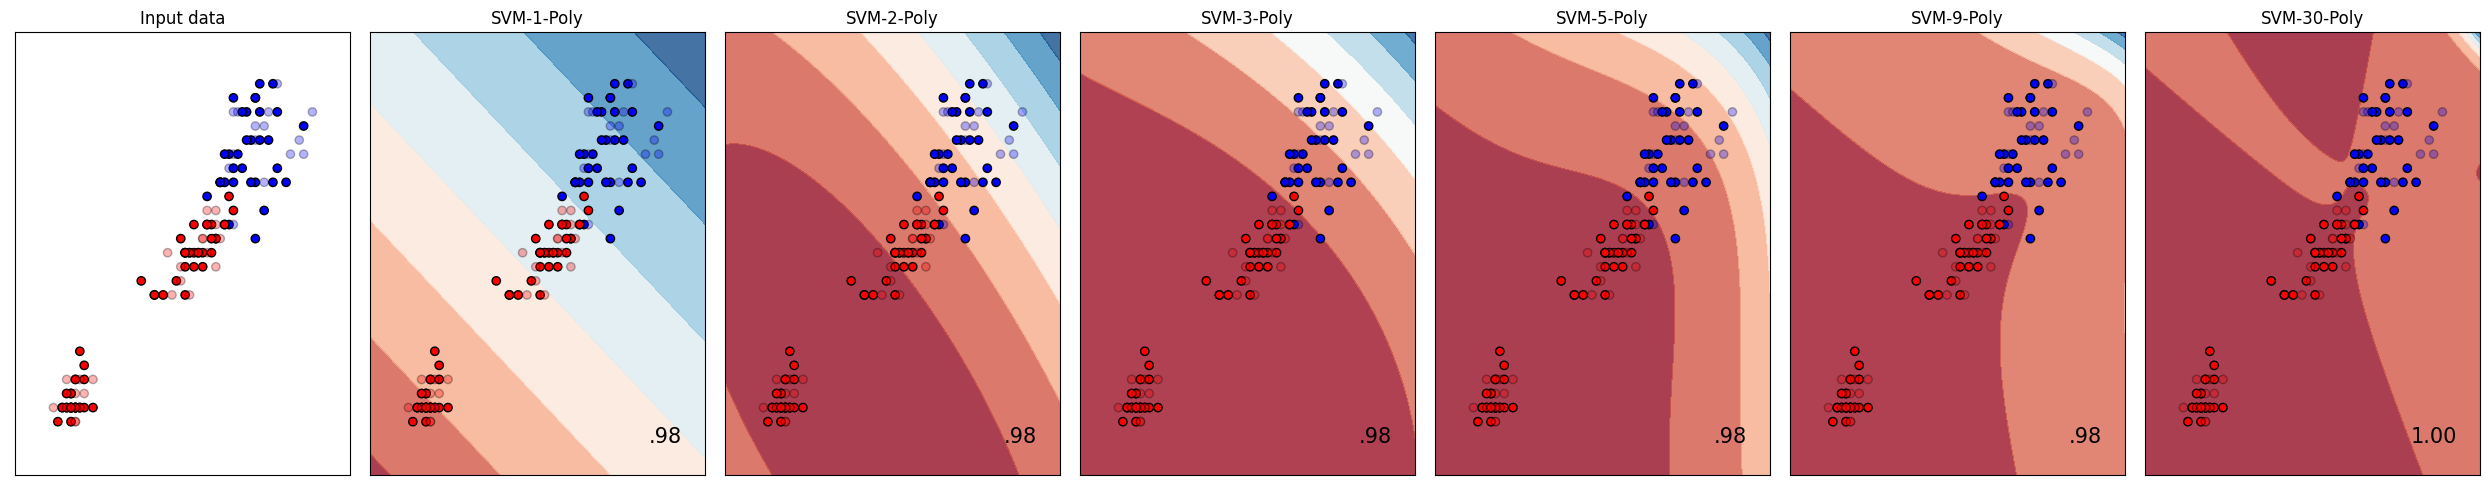

In [259]:
classifiers = []
names = []
for i in [1, 2, 3, 5, 9, 30]:
  classifiers.append(SVC(kernel='poly', degree=i, gamma='scale', coef0=1.0))
  names.append("SVM-"+str(i)+"-Poly")
plot_2d_examples(classifiers, names, dataset, figsize=(25,5))

According to these scores, when the degree is equal 3, it gives score with 0.98. Large C values tries to fit the data but causes the value of the error to increase
Small values of C provides large margin and tries to minimize distance of a point from decision boundary so when  C have small values its score is higher. So C = 3 gives best result.
